# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy import stats as st
from sklearn.metrics import mean_absolute_error
import datetime
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler

# 1. Подготовка данных

### Загрузим данные

In [2]:
gold_recovery_train = pd.read_csv('/datasets/gold_recovery_train.csv', index_col = 'date')
gold_recovery_test = pd.read_csv('/datasets/gold_recovery_test.csv', index_col = 'date')
gold_recovery_full = pd.read_csv('/datasets/gold_recovery_full.csv', index_col = 'date')

### Посмотрим таблицы и информацию о таблицах

In [3]:
gold_recovery_train.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
gold_recovery_test.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [5]:
gold_recovery_full.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [6]:
gold_recovery_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant                      15598 non-null float64
primary_cleaner.i

In [7]:
gold_recovery_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5856 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.input.feed_ag                         584

In [8]:
gold_recovery_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22716 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant                      21170 non-null float64
primary_cleaner.i

### Получены три таблицы: обучающая, тестовая и с полным набором данных. В тестовой таблице наименьшее количество столбцов - 53 против 87 в обучающей и полной таблице. 

### Также в данных присутствуют пропущенные значения во всех данных, за исключением "date". Все столбцы имеют формат float64 и один object (date)

### Проверим правильность расчета эфективности обогащения. Вычислим её на обучающей выборке для признака "rougher.output.recovery". Найдем МАЕ между нашими расчетами и значением признака.

In [9]:
def effectivity(col):
    C = col['rougher.output.concentrate_au']
    F = col['rougher.input.feed_au']
    T = col['rougher.output.tail_au']
    try:
        recovery = (C*(F-T)) / (F*(C-T)) * 100
        return recovery
    except:
        return np.nan
train = gold_recovery_train.dropna()   
train['recovery'] = effectivity (train)
mae = mean_absolute_error(train['recovery'], train['rougher.output.recovery'])
print('МАЕ = ', mae)
print(train[['recovery','rougher.output.recovery']].describe())

МАЕ =  9.555596961987514e-15
           recovery  rougher.output.recovery
count  11017.000000             11017.000000
mean      82.741888                82.741888
std       13.590523                13.590523
min       -0.000000                 0.000000
25%       79.997468                79.997468
50%       84.847754                84.847754
75%       89.635149                89.635149
max      100.000000               100.000000


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


### Проведя расчет и сравнив со значение признака видим, что значение МАЕ крайне мало и значения в данных практически не различаются. На основании этого можно сделать вывод, что эфективность обогащения расчитана правильно

### Анализируя признаки представленные в таблицах видим, что отсутствующие столбцы вероятнее всего содержат целевые признаки , а также содержащие данные которые замеряются и/или рассчитываются значительно позже. Это предположение подтверждается и наличием слов output и calculation в названиях.¶

### Проведем предобрабоку данных.

### Из задания знаем, что соседние по времени параметры часто похожи. Используем это для заполнения пропущенных значений. Заполним пропуски значениями указаных в соседней ячейке.

In [10]:
gold_recovery_train = gold_recovery_train.fillna(method='pad')
gold_recovery_test = gold_recovery_test.fillna(method='pad')
gold_recovery_full = gold_recovery_full.fillna(method='pad')

# 2. Анализ данных

### Расмотрим как меняется концентрация металлов залота(Au), серебра(Ag) и свинца(Pb) на различных эпатах обработки

### построим графики боксплот на основе данных таблицы с полными данными

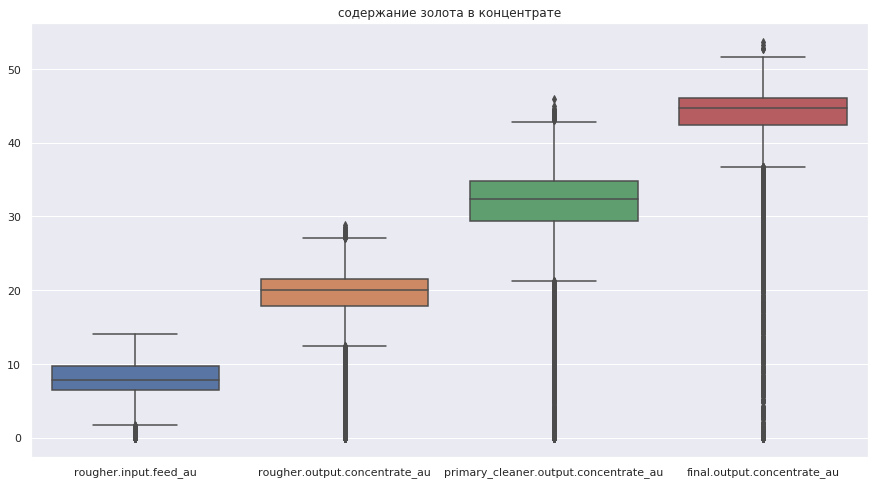

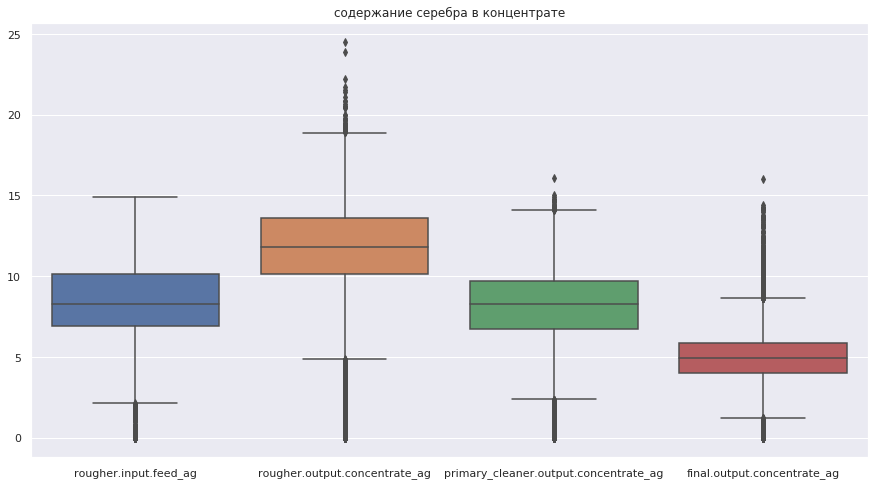

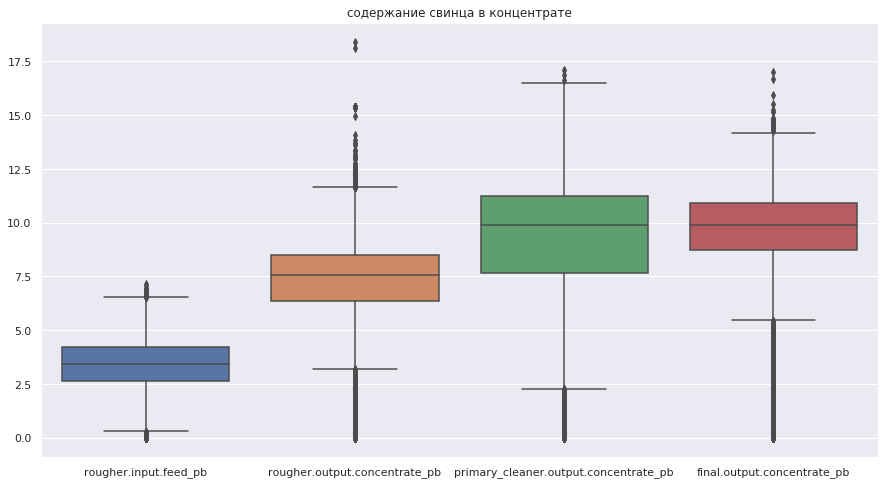

In [11]:
spisok = {'0':['rougher.input.feed_au','rougher.output.concentrate_au','primary_cleaner.output.concentrate_au', 'final.output.concentrate_au'],
          '1':['rougher.input.feed_ag','rougher.output.concentrate_ag','primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag'],
          '2':['rougher.input.feed_pb','rougher.output.concentrate_pb','primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']}
name = {'0':'золота', '1':'серебра', '2':'свинца'}
sns.set(rc={'figure.figsize':(15,8)})
plt.xlim(0, 2)
for i in range(3):
    j = '{}'.format(i)
    order = spisok[j]
    mineral = name[j]
    plt.title('содержание {} в концентрате'.format(mineral))
    sns.boxplot(data=gold_recovery_full,  order=order)
    plt.show()

### По построеным графикам видно, что с каждым этапом обработки кончентрация золота значительно увеличивается начиная в среднем с 20, далее увеличивается до 35 и на заключительном этапе достигает 45. При этом содержание серебра после первого этапа повышается, а затем снижается также заметно 12, 8 , 5. В тоже время содержание свинца незначительно повышается с 7,5 до 10

### Сравним распределение гранул сырья на обучающей и тестовой выборке.

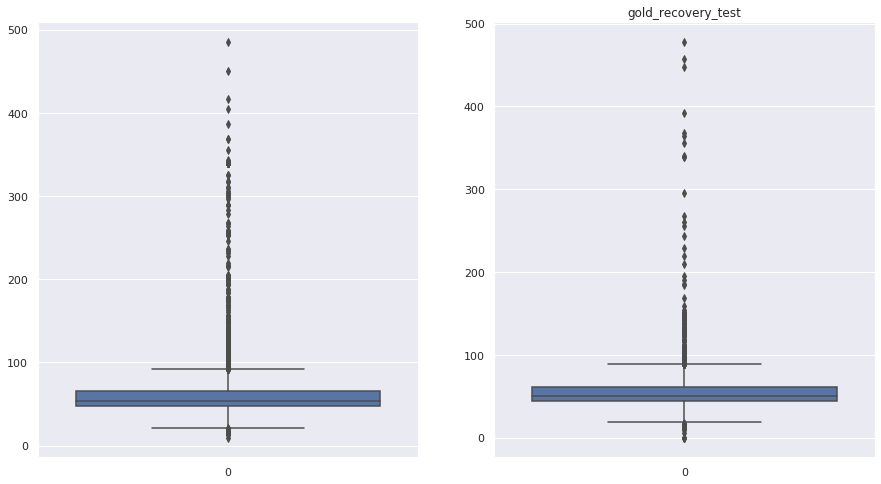

In [12]:
fig, axes = plt.subplots(1,2) 
sns.set(rc={'figure.figsize':(5,12)})
plt.xlim(0, 2)
plt.title('gold_recovery_train')
sns.boxplot(data=gold_recovery_train['rougher.input.feed_size'], ax=axes[0])
plt.title('gold_recovery_test')
sns.boxplot(data=gold_recovery_test['rougher.input.feed_size'], ax=axes[1])
plt.show()

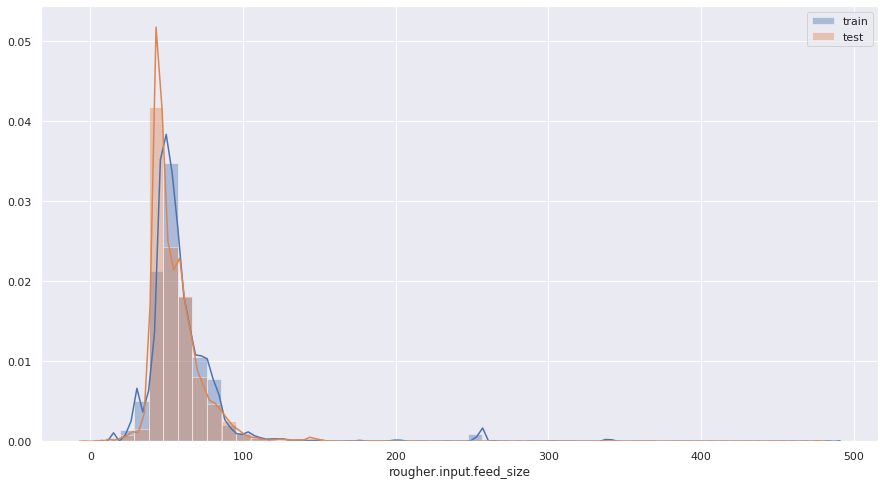

In [13]:
sns.set(rc={'figure.figsize':(15,8)})
sns.distplot(gold_recovery_train['rougher.input.feed_size'])
sns.distplot(gold_recovery_test['rougher.input.feed_size'])
plt.legend(('train', 'test'))

### Расматривая распределение размеров гранул сырья можно отметить, что в обоих выборках основная масса приходится на промежуток от значений близких к 20 до значений около 100. Далее в обоих выборках наблюдаются незначительные выбросы в сторону больших размеров. В целом можно утверждать, что распределение размеров гранул сырья имеют схожий характер и значит оценку модели можно признать правильной.

### Удалим выбросы с целью улучшить качество модели.

In [14]:
gold_recovery_train = gold_recovery_train.loc[(gold_recovery_train['rougher.input.feed_size']<125)]
gold_recovery_test = gold_recovery_test.loc[(gold_recovery_test['rougher.input.feed_size']<125)]

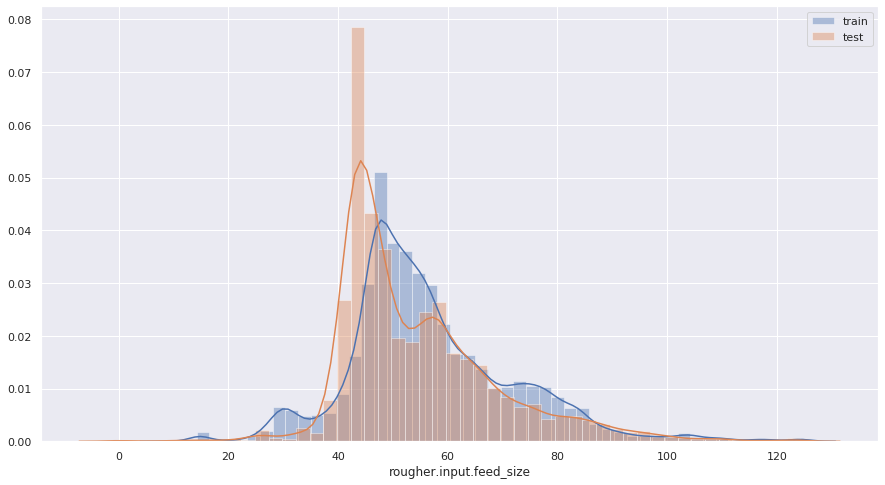

In [15]:
sns.set(rc={'figure.figsize':(15,8)})
sns.distplot(gold_recovery_train['rougher.input.feed_size'])
sns.distplot(gold_recovery_test['rougher.input.feed_size'])
plt.legend(('train', 'test'))

### Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [16]:
gold_recovery_full['fimal_concentrat_sum'] = gold_recovery_full['final.output.concentrate_ag'] + gold_recovery_full['final.output.concentrate_pb'] + gold_recovery_full['final.output.concentrate_sol'] + gold_recovery_full['final.output.concentrate_au']
gold_recovery_full['rougher_concentrat_sum'] = gold_recovery_full['rougher.output.concentrate_ag'] + gold_recovery_full['rougher.output.concentrate_pb'] + gold_recovery_full['rougher.output.concentrate_sol'] + gold_recovery_full['rougher.output.concentrate_au']
gold_recovery_full['primary_cleaner_concentrat_sum'] = gold_recovery_full['primary_cleaner.output.concentrate_ag'] + gold_recovery_full['primary_cleaner.output.concentrate_pb'] + gold_recovery_full['primary_cleaner.output.concentrate_sol'] + gold_recovery_full['primary_cleaner.output.concentrate_au']
gold_recovery_full['input_concentrat_sum'] = gold_recovery_full['rougher.input.feed_ag'] + gold_recovery_full['rougher.input.feed_pb'] + gold_recovery_full['rougher.input.feed_sol'] + gold_recovery_full['rougher.input.feed_au']

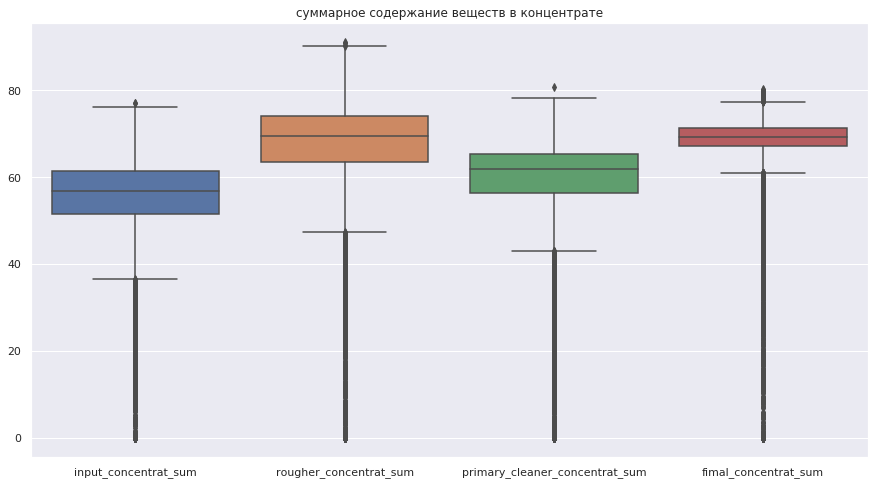

In [17]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlim(0, 2)
plt.title('суммарное содержание веществ в концентрате')
sns.boxplot(data=gold_recovery_full,  order=['input_concentrat_sum','rougher_concentrat_sum',
'primary_cleaner_concentrat_sum', 'fimal_concentrat_sum'])
plt.show()

In [18]:
gold_recovery_train['final_concentrat_sum'] = gold_recovery_train['final.output.concentrate_ag'] + gold_recovery_train['final.output.concentrate_pb'] + gold_recovery_train['final.output.concentrate_sol'] + gold_recovery_train['final.output.concentrate_au']
gold_recovery_train['rougher_concentrat_sum'] = gold_recovery_train['rougher.output.concentrate_ag'] + gold_recovery_train['rougher.output.concentrate_pb'] + gold_recovery_train['rougher.output.concentrate_sol'] + gold_recovery_train['rougher.output.concentrate_au']
gold_recovery_train['primary_cleaner_concentrat_sum'] = gold_recovery_train['primary_cleaner.output.concentrate_ag'] + gold_recovery_train['primary_cleaner.output.concentrate_pb'] + gold_recovery_train['primary_cleaner.output.concentrate_sol'] + gold_recovery_train['primary_cleaner.output.concentrate_au']
gold_recovery_train['input_concentrat_sum'] = gold_recovery_train['rougher.input.feed_ag'] + gold_recovery_train['rougher.input.feed_pb'] + gold_recovery_train['rougher.input.feed_sol'] + gold_recovery_train['rougher.input.feed_au']

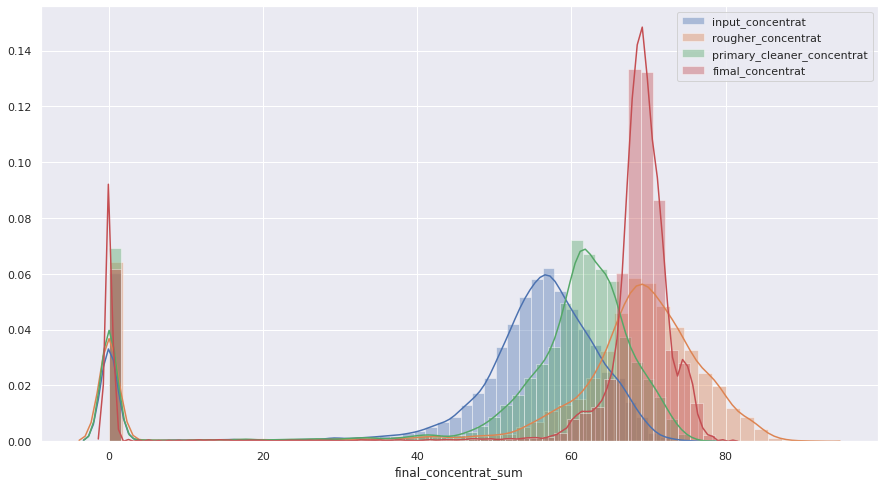

In [19]:
sns.set(rc={'figure.figsize':(15,8)})
sns.distplot(gold_recovery_train['input_concentrat_sum'])
sns.distplot(gold_recovery_train['rougher_concentrat_sum'])
sns.distplot(gold_recovery_train['primary_cleaner_concentrat_sum'])
sns.distplot(gold_recovery_train['final_concentrat_sum'])
plt.legend( ('input_concentrat', 'rougher_concentrat',
                                          'primary_cleaner_concentrat', 'fimal_concentrat'))

In [20]:
gold_recovery_test['input_concentrat_sum'] = gold_recovery_test['rougher.input.feed_ag'] + gold_recovery_test['rougher.input.feed_pb'] + gold_recovery_test['rougher.input.feed_sol'] + gold_recovery_test['rougher.input.feed_au']

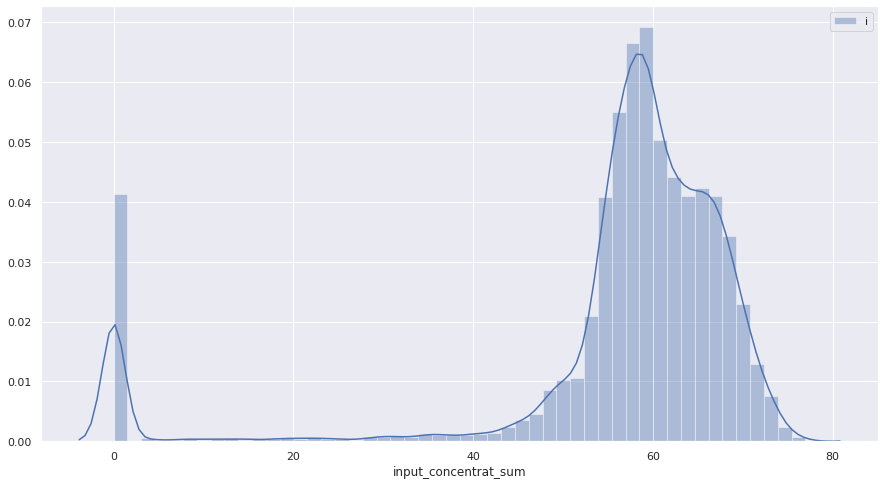

In [21]:
sns.set(rc={'figure.figsize':(15,8)})
sns.distplot(gold_recovery_test['input_concentrat_sum'])
plt.legend( ('input_concentrat'))

### В обучающей и тестовой  выборке заметны анамальные значения в суммарной концентрации веществ на всех стадиях. Наблюдаются выбросы около нулевых значений. Удалим данные вызывающие такое распределение.

In [22]:
gold_recovery_train = gold_recovery_train.loc[(gold_recovery_train['final_concentrat_sum']>60)&(
    gold_recovery_train['rougher_concentrat_sum']>48)&(gold_recovery_train['primary_cleaner_concentrat_sum']>43)&
                                              (gold_recovery_train['input_concentrat_sum']>35)]


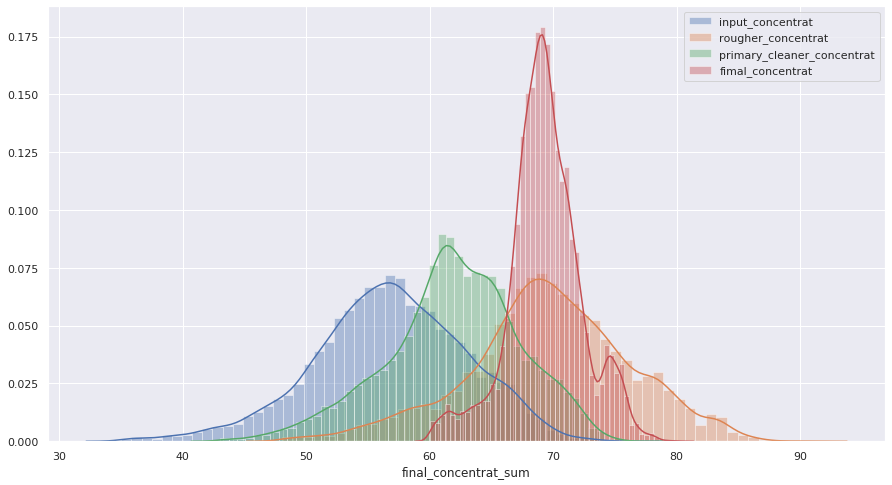

In [23]:
sns.set(rc={'figure.figsize':(15,8)})
sns.distplot(gold_recovery_train['input_concentrat_sum'])
sns.distplot(gold_recovery_train['rougher_concentrat_sum'])
sns.distplot(gold_recovery_train['primary_cleaner_concentrat_sum'])
sns.distplot(gold_recovery_train['final_concentrat_sum'])
plt.legend( ('input_concentrat', 'rougher_concentrat',
                                          'primary_cleaner_concentrat', 'fimal_concentrat'))

In [24]:
gold_recovery_test = gold_recovery_test.loc[(gold_recovery_test['input_concentrat_sum']>35)]

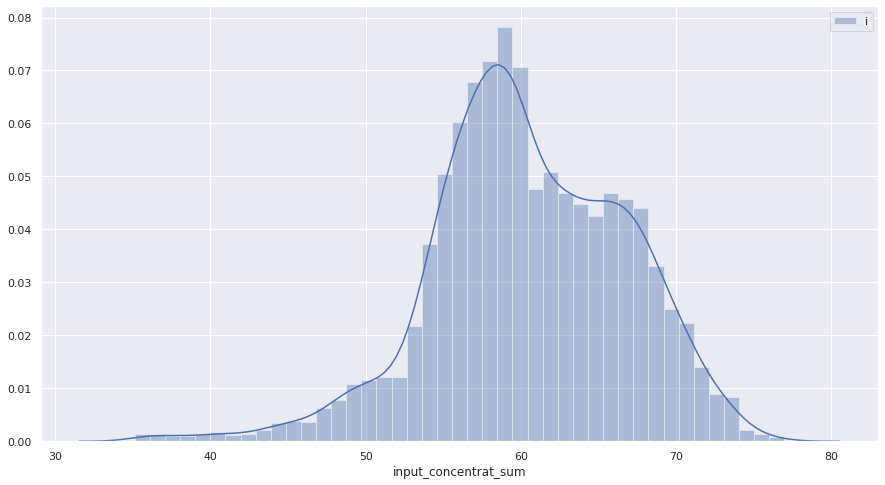

In [25]:
sns.set(rc={'figure.figsize':(15,8)})
sns.distplot(gold_recovery_test['input_concentrat_sum'])
plt.legend( ('input_concentrat'))

In [26]:
gold_recovery_test = gold_recovery_test.drop(['input_concentrat_sum'],axis=1)

# 3. Модель

### Напишем функцию для вычесления итоговой sMAPE - симметричное среднее абсолютное процентное отклонение

In [27]:
def smape(R_predict, R_valid, F_predict, F_valid):
    rougher = 100/len(R_predict) * np.sum((2 * np.abs(R_valid - R_predict)) / (np.abs(R_predict) + np.abs(R_valid)))
    final = 100/len(F_predict) * np.sum((2 * np.abs(F_valid - F_predict)) / (np.abs(F_predict) + np.abs(F_valid)))
    smape_final = 0.25*rougher  +  0.75*final
    return smape_final

### обучим различные модели и оценим их качество кросс-валидацией.


### Перед обучением выделим целевые признаки rougher.output.recovery и final.output.recovery из обучающей выборки

In [28]:
target_rougher = gold_recovery_train['rougher.output.recovery']
target_final = gold_recovery_train['final.output.recovery']

### Оставим в обучающей выборке только те признаки которые присутствуют в тестовой выборке, т.к. они содержат значения которые расчитываются в процессе обогощения сырья. 

In [29]:
name_column = gold_recovery_test.columns

In [30]:
data_train = gold_recovery_train.loc[:, gold_recovery_train.columns.isin(name_column)]

### Разделим обучающую выборку на признаки влияющие на целевые признаки rougher.output.recovery и final.output.recovery

In [31]:
features_rougher = data_train.filter(regex = '^rougher', axis=1)

In [32]:
features_final = data_train.drop(features_rougher.columns, axis=1)

### проведем обучение моделей на обучающей выборке и оценим их качество кросс-валидацией.

In [33]:
model_LR = LinearRegression()
predict_r = cross_val_predict(model_LR, features_rougher, target_rougher, cv=5)
features_final['rougher']=predict_r
predict_f = cross_val_predict(model_LR, features_final, target_final, cv=5)
print('Значение sMAPE LR = ', smape(predict_r, target_rougher, predict_f, target_final))

Значение sMAPE LR =  8.73926667336518


In [34]:
i = 0
result = pd.DataFrame(columns=['max_depth', 'sMAPE'])
for max_depth in range(1, 15, 2):
    model_DTC = DecisionTreeRegressor(random_state=0, max_depth=max_depth)
    predict_r = cross_val_predict(model_DTC, features_rougher, target_rougher, cv=5)
    predict_f = cross_val_predict(model_DTC, features_final, target_final, cv=5)
    result.loc[i] = [max_depth, smape(predict_r, target_rougher, predict_f, target_final)] 
    i += 1
result.sort_values('sMAPE')

,max_depth,sMAPE
1,3.0,8.784297
0,1.0,9.144740
2,5.0,9.645776
3,7.0,12.578692
4,9.0,14.272636
6,13.0,15.137411
5,11.0,15.361826


In [36]:
i = 0
result = pd.DataFrame(columns=['n_estimators','max_depth', 'sMAPE'])
for n_estimators in range(10, 101, 10):
     for max_depth in range(1, 10, 2): 
        model_RFR = RandomForestRegressor(random_state=12345, n_estimators=n_estimators, max_depth=max_depth)
        predict_r = cross_val_predict(model_DTC, features_rougher, target_rougher, cv=5)
        predict_f = cross_val_predict(model_DTC, features_final, target_final, cv=5)
        result.loc[i] = [n_estimators, max_depth, smape(predict_r, target_rougher, predict_f, target_final)]
        i += 1
result.sort_values('sMAPE').head(5)

,n_estimators,max_depth,sMAPE
0,10.0,1.0,15.137411
27,60.0,5.0,15.137411
28,60.0,7.0,15.137411
29,60.0,9.0,15.137411
30,70.0,1.0,15.137411


### Лучшие значения sMAPE модели получились у модели линейной регресии со значением равным 8,73 её и возьмем для проверки на тестовой выборке

### Обучим модели используя данные в соответствии с целевыми признаками

In [37]:
features_test_r = gold_recovery_test.filter(regex = '^rougher', axis=1)
features_test_f = gold_recovery_test.drop(features_test_r.columns, axis=1)

In [39]:
model_LR.fit(features_rougher, target_rougher)
predicted_valid_r = model_LR.predict(features_test_r)
features_test_f['rougher']=predicted_valid_r
model_LR.fit(features_final, target_final)
predicted_valid_f = model_LR.predict(features_test_f)

### Приготовим готовые значения целевых признаков из полного набора данных

In [40]:
data_full_test = gold_recovery_full.query('index in @gold_recovery_test.index')

In [41]:
target_test_r = data_full_test['rougher.output.recovery']
target_test_f = data_full_test['final.output.recovery']

### Проверим модель используя метрику sMAPE

In [42]:
print('Итоговое значение sMAPE = {:.2f}'.format(smape(predicted_valid_r, target_test_r, predicted_valid_f, target_test_f)),'%')

Итоговое значение sMAPE = 9.35 %


### Расчитаем sMAPE на "примитивной" модели - предикативные значения примем равными средним арифметическим значениям целевых признаков

In [43]:
model_DR = DummyRegressor(strategy='median')
model_DR.fit(features_rougher, target_rougher) 
predict_DR_r = model_DR.predict(features_test_r)
model_DR.fit(features_final, target_final) 
predict_DR_f = model_DR.predict(features_test_f)

In [44]:
predict_DR_f = model_DR.predict(features_test_f)

In [45]:
print('Итоговое sMAPE ,примитивной модели:{:.2f}'.format(smape(predict_DR_r, target_test_r, predict_DR_f, target_test_f)), "%")

Итоговое sMAPE ,примитивной модели:9.68 %


###  Рассматривая проведеное исследование можно сказать, что наилучшим вариантом модели которая поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками, можно признать модель линейной регрессии, показавшей наилучший результат при выборе модели по метрике sMAPE равным 8,73. А при проверке на тестовой выборке модель показала результат равный 9.35
### При сравнении метрик  предложенной и примитивной моделей видно, что показатели sMAPE линейной регрессии имеют меньшее значение 9.35% против 9,68%. Это позволяет сделать вывод о правильном выборе модели.
### Так же можно отметить, что большое влияние на результат имеет наличие выбросов в первичных данных. После их удаления модель продемонстрировала значительно большую точность.